In [122]:
import pandas as pd
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt

In [121]:
dataset_path = './data/dataset.csv'
df = pd.read_csv(dataset_path)

print(df.head(20))

                 event_time             order_id           product_id  \
0   2020-04-24 11:50:39 UTC  2294359932054536986  1515966223509089906   
1   2020-04-24 11:50:39 UTC  2294359932054536986  1515966223509089906   
2   2020-04-24 14:37:43 UTC  2294444024058086220  2273948319057183658   
3   2020-04-24 14:37:43 UTC  2294444024058086220  2273948319057183658   
4   2020-04-24 19:16:21 UTC  2294584263154074236  2273948316817424439   
5   2020-04-26 08:45:57 UTC  2295716521449619559  1515966223509261697   
6   2020-04-26 09:33:47 UTC  2295740594749702229  1515966223509104892   
7   2020-04-26 09:33:47 UTC  2295740594749702229  1515966223509104892   
8   2020-04-26 09:33:47 UTC  2295740594749702229  1515966223509104892   
9   2020-04-26 09:33:47 UTC  2295740594749702229  1515966223509104892   
10  2020-04-26 14:55:26 UTC  2295902490203259134  2273948311742316796   
11  2020-04-26 23:35:39 UTC  2296164324487463110  1515966223509259473   
12  2020-04-27 07:24:51 UTC  2296400480990920715  2

price    50925.9
dtype: float64
price    0.0
dtype: float64


<AxesSubplot:>

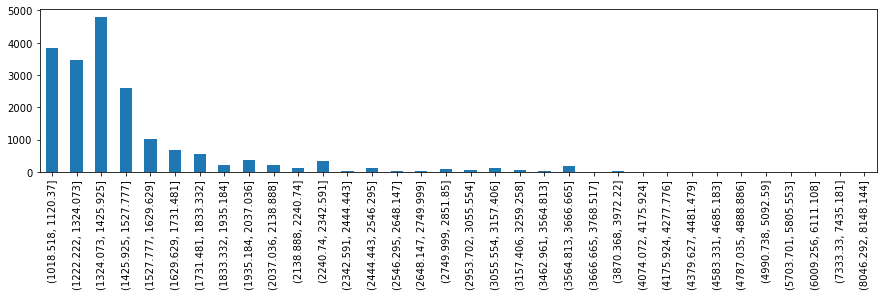

In [197]:
price_df = df[['price']]
print(price_df.max())
print(price_df.min())

 
top = price_df['price'].value_counts(bins=500).sort_index()
top = top[(top>5)]
top = top[(top<5000)]

top.plot(kind='bar', figsize=(15,3))

<AxesSubplot:>

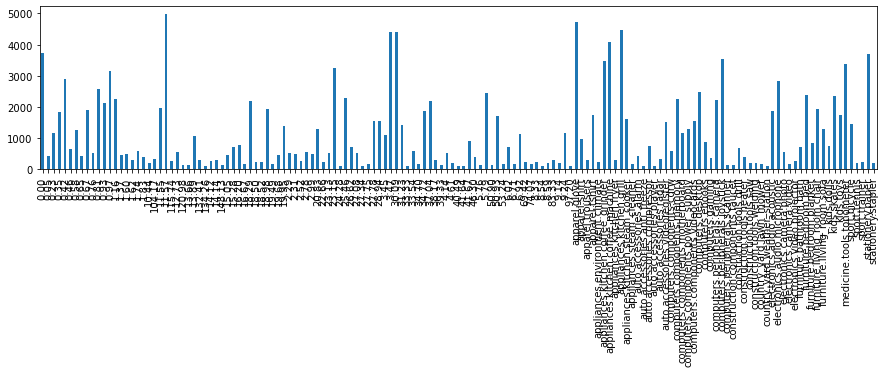

In [198]:
category_df = df[['category_code']]
top = category_df['category_code'].value_counts().sort_index()
top = top[(top<5000)]
top = top[(top>100)]

top.plot(kind='bar', figsize=(15,3))

In [145]:
# Convert the data type of column 'Date' from string (YYYY/MM/DD) to datetime64
df["event_time"] =  pd.to_datetime(df["event_time"], format="%Y-%m-%d %H:%M:%S UTC")
df["category_code"] = pd.Categorical(df["category_code"])

df["time_hours"] = df["event_time"].dt.hour
df["weekday"] = df["event_time"].dt.weekday
print(df.dtypes)

print(df.head(10))

event_time       datetime64[ns]
order_id                  int64
product_id                int64
category_id             float64
category_code          category
brand                    object
price                   float64
user_id                 float64
time_hours                int64
weekday                   int64
dtype: object
           event_time             order_id           product_id   category_id  \
0 2020-04-24 11:50:39  2294359932054536986  1515966223509089906  2.268105e+18   
1 2020-04-24 11:50:39  2294359932054536986  1515966223509089906  2.268105e+18   
2 2020-04-24 14:37:43  2294444024058086220  2273948319057183658  2.268105e+18   
3 2020-04-24 14:37:43  2294444024058086220  2273948319057183658  2.268105e+18   
4 2020-04-24 19:16:21  2294584263154074236  2273948316817424439  2.268105e+18   
5 2020-04-26 08:45:57  2295716521449619559  1515966223509261697  2.268105e+18   
6 2020-04-26 09:33:47  2295740594749702229  1515966223509104892  2.268105e+18   
7 2020-04-26 09:33

<AxesSubplot:>

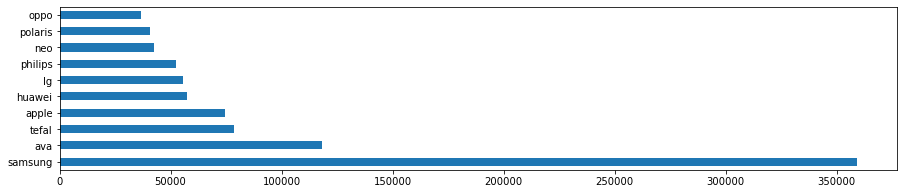

In [140]:
brand_df = df[['brand']]
brand_counts = brand_df['brand'].value_counts()

top_brands = brand_counts[:10]
top_brands.plot(kind='barh', figsize=(15,3))

In [162]:
price_by_category = df.groupby('category_code')['price'].mean()
price_by_category = price_by_category[(price_by_category>0.0)]
price_by_category = price_by_category.sort_values(ascending=False)
price_by_category.head(10)

category_code
electronics.camera.video            620.713450
electronics.camera.photo            504.926867
construction.tools.heater           503.302107
appliances.kitchen.dishwasher       489.100339
computers.notebook                  438.919187
kids.skates                         436.492356
appliances.kitchen.oven             409.034069
electronics.video.tv                408.601552
appliances.kitchen.refrigerators    407.153718
computers.desktop                   400.345222
Name: price, dtype: float64

In [171]:
under_20_df = df[(df['price'] < 20.0)]

top_brand_under_20 = under_20_df['brand'].value_counts()
top_brand_under_20.head(10)

ava            59979
akvafor        23733
samsung        20971
polimerbiht    20116
camelion       17387
technodom      14131
tefal          13724
transcend      12944
scarlett       12832
vitek          12418
Name: brand, dtype: int64

In [172]:
top_category_under_20 = under_20_df['category_code'].value_counts()
top_category_under_20.head(10)

computers.peripherals.mouse       34608
stationery.battery                24935
appliances.personal.scales        23115
electronics.audio.headphone       22890
appliances.kitchen.kettle         22488
electronics.smartphone            17427
furniture.living_room.cabinet     16913
furniture.kitchen.table           14358
computers.notebook                13630
furniture.living_room.shelving    12146
Name: category_code, dtype: int64

In [183]:
def distribution_over_weekdays(_df):
    weekdays = ['mon', 'tue', 'wed', 'thur', 'fri', 'sat', 'sun']
    weekday_counts = _df['weekday'].value_counts().sort_index()

    plt.plot(weekdays, weekday_counts.values)
    plt.show()


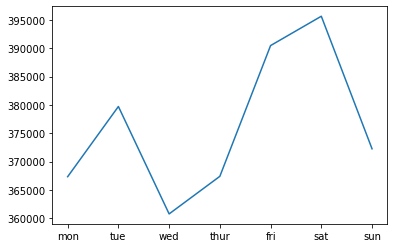

In [184]:
distribution_over_weekdays(df)

In [210]:
def total_sales_of_category_in_year(_df, X, Y):
    df_by_cat_year = _df.loc[(_df['event_time'].dt.year == Y) & (_df['category_code'] == X)]
    total_sales = df_by_cat_year['price'].sum()
    return round(total_sales, 2)

In [211]:
y = 2020
x = "furniture.living_room.shelving"
total_sales_of_category_in_year(df, x, y)

160126.21

In [212]:
def sales_probability_by_price(_df, X, Y):
    n_sales = len(_df[(_df['brand'] == X)])
    n_sales_above_price = len(_df[(df['brand'] == X) & (_df['price'] > Y)])
    prob = n_sales_above_price / n_sales
    return round(prob, 2)

In [213]:
x = 'samsung'
y = 200.0

sales_probability_by_price(df, x, y)

0.42